<a href="https://colab.research.google.com/github/Gcango/Analise_e_Avaliacao_curso_da_Udemy/blob/main/Analise_Avalia%C3%A7ao_UdemyCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projecto de analise de dados, foi possivel analisar dados referentes aos cursos ministrados na UDEMY. Esses dados estão de igual forma disponivel no Kaggle, serviram para responder questões pertinentes sobre os cursos. Foi feita uma análise descritiva dos dados, e questões foram colocadas e respondidas ao longo do documento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv("/content/Udemy_Courses.csv", parse_dates=['published_timestamp'])

In [3]:
dados.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments


In [4]:
dados.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [5]:
#1) - Qual é a Quantidade de Linhas e Colunas do Dataset?

In [6]:
print(f"Este dataset possui num total {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

Este dataset possui num total 3682 linhas e 11 colunas 


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   object             
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 291.4+ KB


In [8]:
#Verificação de possivel existência de Valores Nulos
dados.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

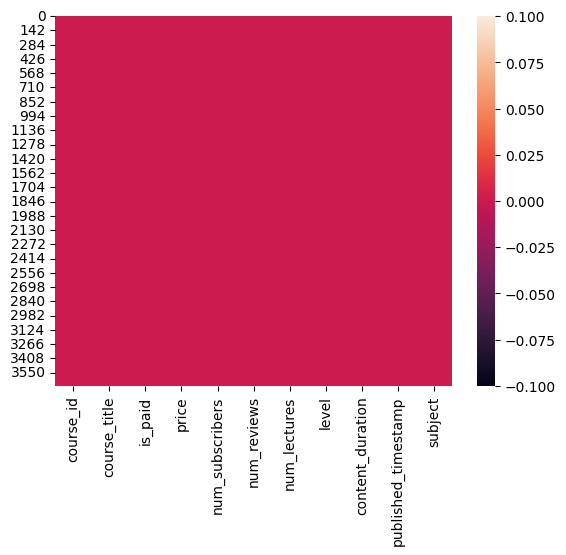

In [9]:
#Ver de forma gráfica a existência dos Valores nulos
sns.heatmap(dados.isnull());

In [10]:
#Vericação de duplicados no dataset
dados.duplicated().any()

True

In [11]:
dados = dados.drop_duplicates()

In [12]:
dados.duplicated().any()

False

In [13]:
#2) - Descubra a Quantidade de Cursos disponiveis neste dataset?

In [14]:
dados.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [15]:
qtd_curso = dados['subject'].value_counts()
print(f"Neste dataset estão presentes os seguintes Cursos: \n{qtd_curso}")

Neste dataset estão presentes os seguintes Cursos: 
Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64


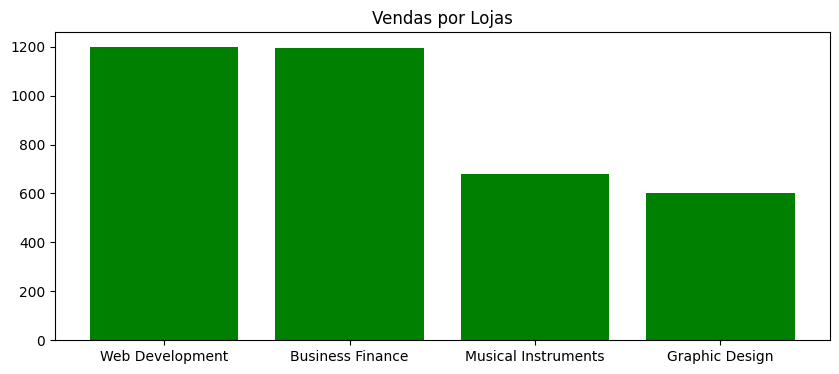

In [75]:
#sns.barplot(dados['subject'])
#plt.xlabel("Subjects")
#plt.ylabel("Number of Courses Per Subject")
#plt.xticks(rotation=90)
#plt.show()

plt.figure(figsize=(10, 4))
plt.bar(qtd_curso.index, qtd_curso.values, color='g')
plt.title('Vendas por Lojas');
plt.show()

In [17]:
#3) - Para quais níveis os Cursos da Udemy Descubra a Quantidade de Cursos disponiveis neste dataset?

In [18]:
cursos = dados['level'].value_counts()
print(f"Os níveis dos cursos ministrados na Udeny de acordo como o dataset são: \n{cursos}")

Os níveis dos cursos ministrados na Udeny de acordo como o dataset são: 
All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


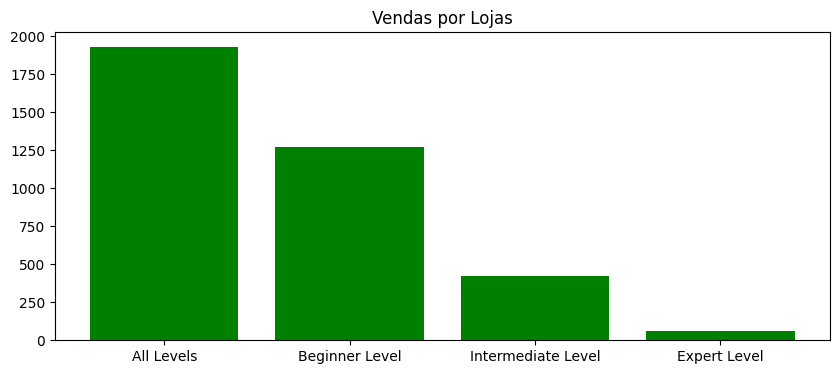

In [73]:
#sns.barplot(dados['level'])
#plt.xlabel("Level", fontsize=11)
#plt.ylabel("Number of Courses Per Level",fontsize=11)
#plt.xticks(rotation=90)
#plt.show()

plt.figure(figsize=(10, 4))
plt.bar(cursos.index, cursos.values, color='g')
plt.title('Vendas por Lojas');
plt.show()

In [20]:
#4) - Enumera os Cursos Gratis e Pagos disponiveis no UDEME?

In [30]:
gratis_pago = dados['is_paid'].value_counts()
print(f"Os Cursos estão enuemerados da seguinte forma:")
print(f"Pagos -> {gratis_pago[0]} \nGratis -> {gratis_pago[1]}")

 Os Cursos estão enuemerados da seguinte forma:
Pagos -> 3366 
Gratis -> 310


In [22]:
#5) - Qual é a média de aulas gratis e pagas?

In [33]:
media_aulas_gp = dados.groupby('is_paid')['num_lectures'].mean()
print(f"Média de aulas Gratuitas -> {media_aulas_gp[0]:.3f}")
print(f"Média de aulas Pagas -> {media_aulas_gp[1]:.3f}")

Média de aulas Gratuitas -> 21.416
Média de aulas Pagas -> 41.817


In [ ]:
#6) - Faça uma represenação dos Cursos de acordo com o seu numeros de assinantes pagos ou gratuitos?

In [36]:
curso_assinates = dados[['subject','is_paid']].value_counts()
curso_assinates

subject              is_paid
Business Finance     True       1099
Web Development      True       1066
Musical Instruments  True        634
Graphic Design       True        567
Web Development      False       133
Business Finance     False        96
Musical Instruments  False        46
Graphic Design       False        35
dtype: int64

In [ ]:
#7) - Qual nível de formação tem mais assinantes?

<ipython-input-70-e0caa9d4fb52>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='level', y='num_subscribers', data=dados, palette="pastel");


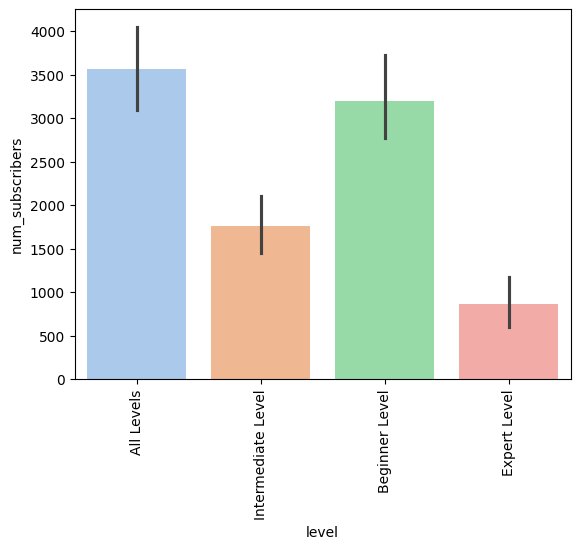

In [70]:
sns.barplot(x='level', y='num_subscribers', data=dados, palette="pastel");
plt.xticks(rotation=90)
plt.show()

In [ ]:
#8) - Qual Curso pode ser considerado mais Popular?

In [51]:
dados.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [53]:
maior_insc = dados['num_subscribers'].max()
maior_insc

268923

In [57]:
curso_popular = dados[dados['num_subscribers'].max() == dados['num_subscribers']]['course_title']
print(f"Podemos assumir que o curso mais Popular neste dataset tem os seguintes dados: ")
curso_popular

Podemos assumir que o curso mais Popular neste dataset tem os seguintes dados: 


2230    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [ ]:
#9) - Faça uma representação de 10 crusos mais populares de acordo com o seu numero de assinantes?

In [58]:
dados.sort_values(by='num_subscribers', ascending=False).head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development
1388,19421,Free Beginner Electric Guitar Lessons,False,Free,101154,1042,95,Beginner Level,4.5 hours,2012-06-15 17:00:33+00:00,Musical Instruments
3556,473160,Web Design for Web Developers: Build Beautiful...,False,Free,98867,6512,20,All Levels,3 hours,2015-04-13 18:29:47+00:00,Web Development
2233,94430,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2 hours,2013-10-10 15:19:29+00:00,Web Development
2886,130064,Practical PHP: Master the Basics and Code Dyna...,False,Free,83737,4598,45,All Levels,6.5 hours,2014-07-19 03:02:05+00:00,Web Development
2034,364426,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5 hours,2015-03-12 23:19:54+00:00,Web Development


In [60]:
top_10 = dados.sort_values(by='num_subscribers', ascending=False).head(10)

<ipython-input-69-1983c2cb1eb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_subscribers', y='course_title', data=top_10, palette="pastel");


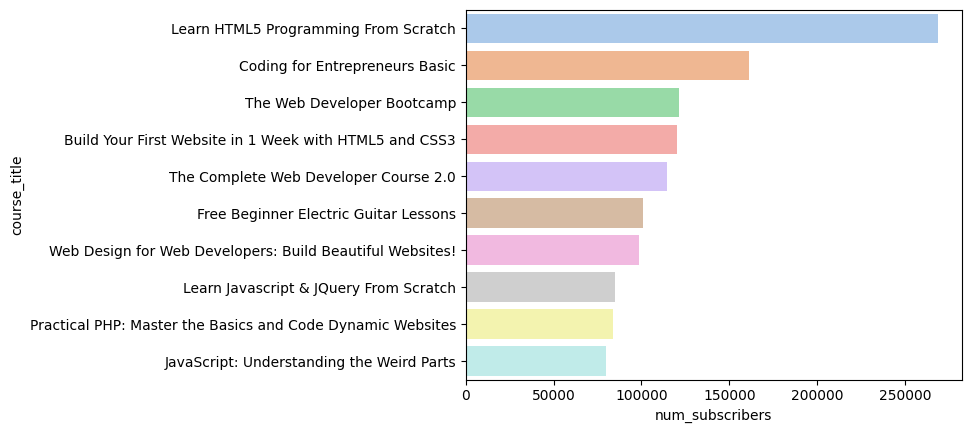

In [69]:
sns.barplot(x='num_subscribers', y='course_title', data=top_10, palette="pastel");

In [ ]:
#10) - Mostre o curso com a maior avaliação?

In [63]:
dados['num_reviews'].max()

27445

In [65]:
avaliacoa = dados[dados['num_reviews'].max() == dados['num_reviews']]['subject']
print(f"Podemos assumir que o curso com maior avaliação é: ")
avaliacoa

Podemos assumir que o curso com maior avaliação é: 


3385    Web Development
Name: subject, dtype: object

<ipython-input-76-edfcf05cbb79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject', y='num_reviews', data=dados, palette="pastel")


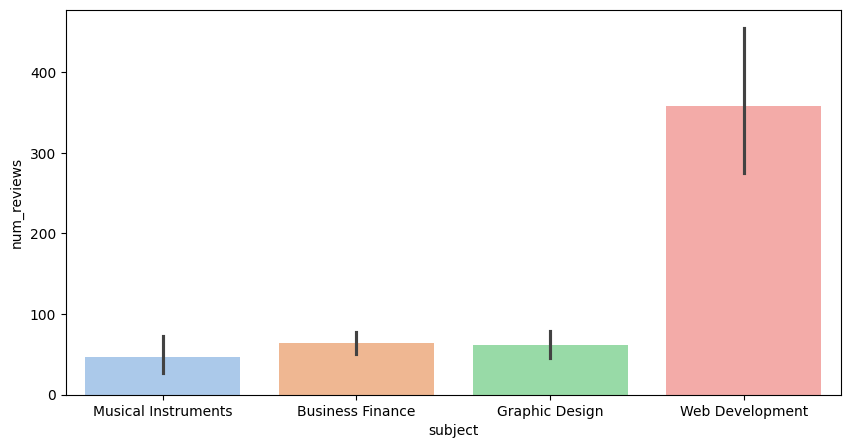

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='subject', y='num_reviews', data=dados, palette="pastel")
plt.show();

In [ ]:
#11) - Pode-se afirmar que o preço tem algum impacto sobre as avaliações?

<ipython-input-80-ffab58c9b9f0>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y='num_reviews', data=dados, palette="vlag")


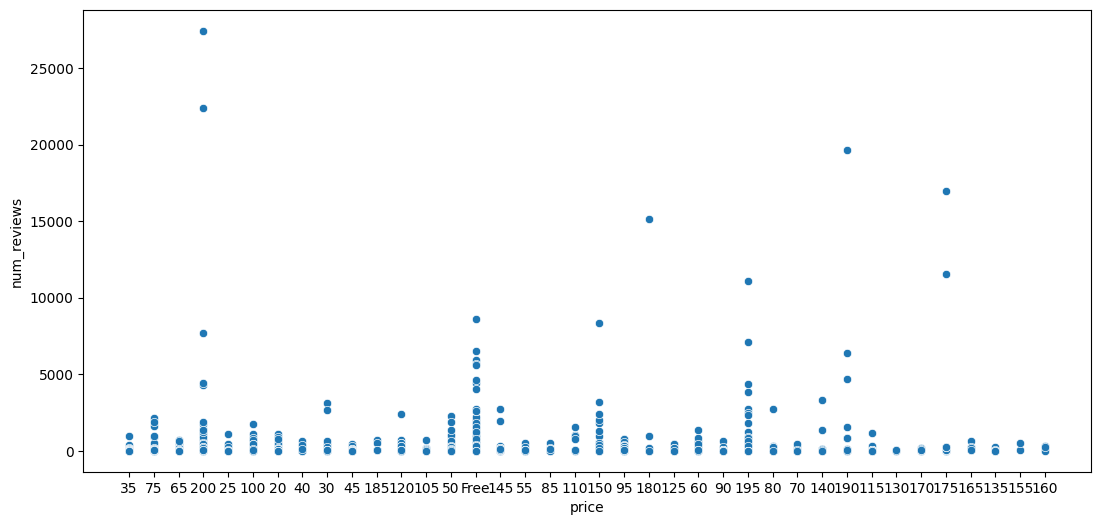

In [80]:
#Olhando as variaveis com o gráfico
plt.figure(figsize=(13,6))
sns.scatterplot(x='price', y='num_reviews', data=dados, palette="vlag")
plt.show();